In [6]:
import pandas as pd # for data manipulation
from sklearn.linear_model import LinearRegression
import numpy as np # for mathematical calculation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import itertools
import gc
import os
import sys
%matplotlib inline

In [2]:
!wget https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv

--2021-08-10 20:52:09--  https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6031:18::a27d:5112, 162.125.81.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6031:18::a27d:5112|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ncqb2ctkg7da11k/weather.csv [following]
--2021-08-10 20:52:10--  https://www.dropbox.com/s/raw/ncqb2ctkg7da11k/weather.csv
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd4387b78dedf10ba960ea4f60a.dl.dropboxusercontent.com/cd/0/inline/BT_vrrqGmjeH8Glb1CPts-s4XCzu1Ps9Oxx2QPlq07zFddVNEOWtddj5u2CbPhCergjRnnvBkFQMBpoZrYFY3ie4hmvZA6hJH4SrhKM443KJswWmPROOubvD0iI7c552M2F0lytggVGOmcpOqegg46z8/file# [following]
--2021-08-10 20:52:10--  https://ucd4387b78dedf10ba960ea4f60a.dl.dropboxusercontent.com/cd/0/inline/BT_vrrqGmjeH8Glb1CPts-s4XCzu1Ps9Oxx2QPlq07zFddVNEOWtddj5u2CbPhCergjRnnvBkF

In [3]:
!wget https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv

--2021-08-10 21:01:47--  https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6031:18::a27d:5112, 162.125.81.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6031:18::a27d:5112|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/brixkogrmhan6ed/cab_rides.csv [following]
--2021-08-10 21:01:48--  https://www.dropbox.com/s/raw/brixkogrmhan6ed/cab_rides.csv
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc36e3263857b1ea862c543c9a98.dl.dropboxusercontent.com/cd/0/inline/BT9rdBAJiIgzmw6vaAX1NycZoC-03VpJHgLgsCwE0wBHzvoRrbHqbX2vfsGv0uPK0JSZcySg_86H2BbBITn1-ZmBshjjfdzWBj-Z-6zZN16XwhskLqgzFFYr2BUK4MEp73U1gBc4I2yGDu07wW-vAaSO/file# [following]
--2021-08-10 21:01:48--  https://uc36e3263857b1ea862c543c9a98.dl.dropboxusercontent.com/cd/0/inline/BT9rdBAJiIgzmw6vaAX1NycZoC-03VpJHgLgsCwE0wBHzvoRrbHqbX2vfsGv0uPK0JSZ

  6900K .......... .......... .......... .......... ..........  8% 42.4M 1m42s
  6950K .......... .......... .......... .......... ..........  8% 79.6K 1m48s
  7000K .......... .......... .......... .......... ..........  8% 43.1M 1m47s
  7050K .......... .......... .......... .......... ..........  8% 73.3M 1m47s
  7100K .......... .......... .......... .......... ..........  8% 78.5M 1m46s
  7150K .......... .......... .......... .......... ..........  8% 34.9M 1m45s
  7200K .......... .......... .......... .......... ..........  8% 63.6M 1m44s
  7250K .......... .......... .......... .......... ..........  8%  236K 1m46s
  7300K .......... .......... .......... .......... ..........  8% 10.1M 1m45s
  7350K .......... .......... .......... .......... ..........  8%  427K 1m45s
  7400K .......... .......... .......... .......... ..........  8% 7.61M 1m45s
  7450K .......... .......... .......... .......... ..........  8%  146K 1m48s
  7500K .......... .......... .......... .......... 

 74150K .......... .......... .......... .......... .......... 85%  542K 13s
 74200K .......... .......... .......... .......... .......... 85%  410K 13s
 74250K .......... .......... .......... .......... .......... 85%  458K 13s
 74300K .......... .......... .......... .......... .......... 85% 47.5M 13s
 74350K .......... .......... .......... .......... .......... 85% 60.0M 13s
 74400K .......... .......... .......... .......... .......... 85% 65.3M 12s
 74450K .......... .......... .......... .......... .......... 85% 8.66M 12s
 74500K .......... .......... .......... .......... .......... 86% 11.1M 12s
 74550K .......... .......... .......... .......... .......... 86% 2.62M 12s
 74600K .......... .......... .......... .......... .......... 86%  209K 12s
 74650K .......... .......... .......... .......... .......... 86% 10.0M 12s
 74700K .......... .......... .......... .......... .......... 86%  461K 12s
 74750K .......... .......... .......... .......... .......... 86% 43.2M 12s

In [4]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [7]:
cab_data = pd.read_csv("cab_rides.csv")
cab_data = reduce_mem_usage(cab_data)
weather_data = pd.read_csv("weather.csv")
weather_data = reduce_mem_usage(weather_data)

Memory usage of dataframe is 52.88 MB
Memory usage after optimization is: 44.95 MB
Decreased by 15.0%
Memory usage of dataframe is 0.38 MB
Memory usage after optimization is: 0.22 MB
Decreased by 43.7%


In [8]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [9]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [10]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [11]:
import datetime
cab_data['datetime'] = pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['datetime'] = pd.to_datetime(cab_data['time_stamp'])

In [12]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime'],
      dtype='object')

In [13]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'datetime'],
      dtype='object')

In [14]:
cab_data.shape

(693071, 11)

In [17]:
weather_data.shape

(6276, 9)

In [19]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.190057,1.544046e+12,16.543797,1.013870
std,1.138935,6.891925e+08,9.319172,0.091467
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [21]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090378,0.677775,1008.443176,0.057652,1.543857e+09,0.763976,6.802810
std,6.022061,0.314283,12.870790,0.100758,6.659340e+05,0.127340,3.633476
min,19.620001,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077501,0.440000,997.747498,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130001,0.780000,1007.659973,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832501,0.970000,1018.479980,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.119995,0.780700,1.545159e+09,0.990000,18.180000


In [23]:
a = pd.concat([cab_data, weather_data])

In [25]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
a['day'] = a.datetime.dt.day
a['hour'] = a.datetime.dt.hour

In [30]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [32]:
a.fillna(0, inplace = True)

In [34]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0


In [36]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [38]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<AxesSubplot:xlabel='cab_type'>

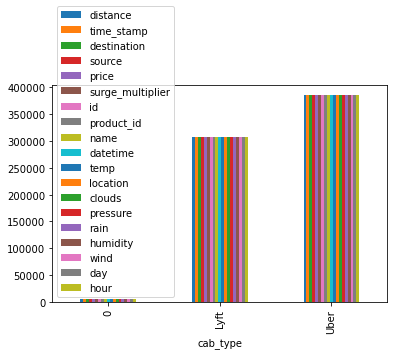

In [40]:
a.groupby('cab_type').count().plot.bar()

<AxesSubplot:>

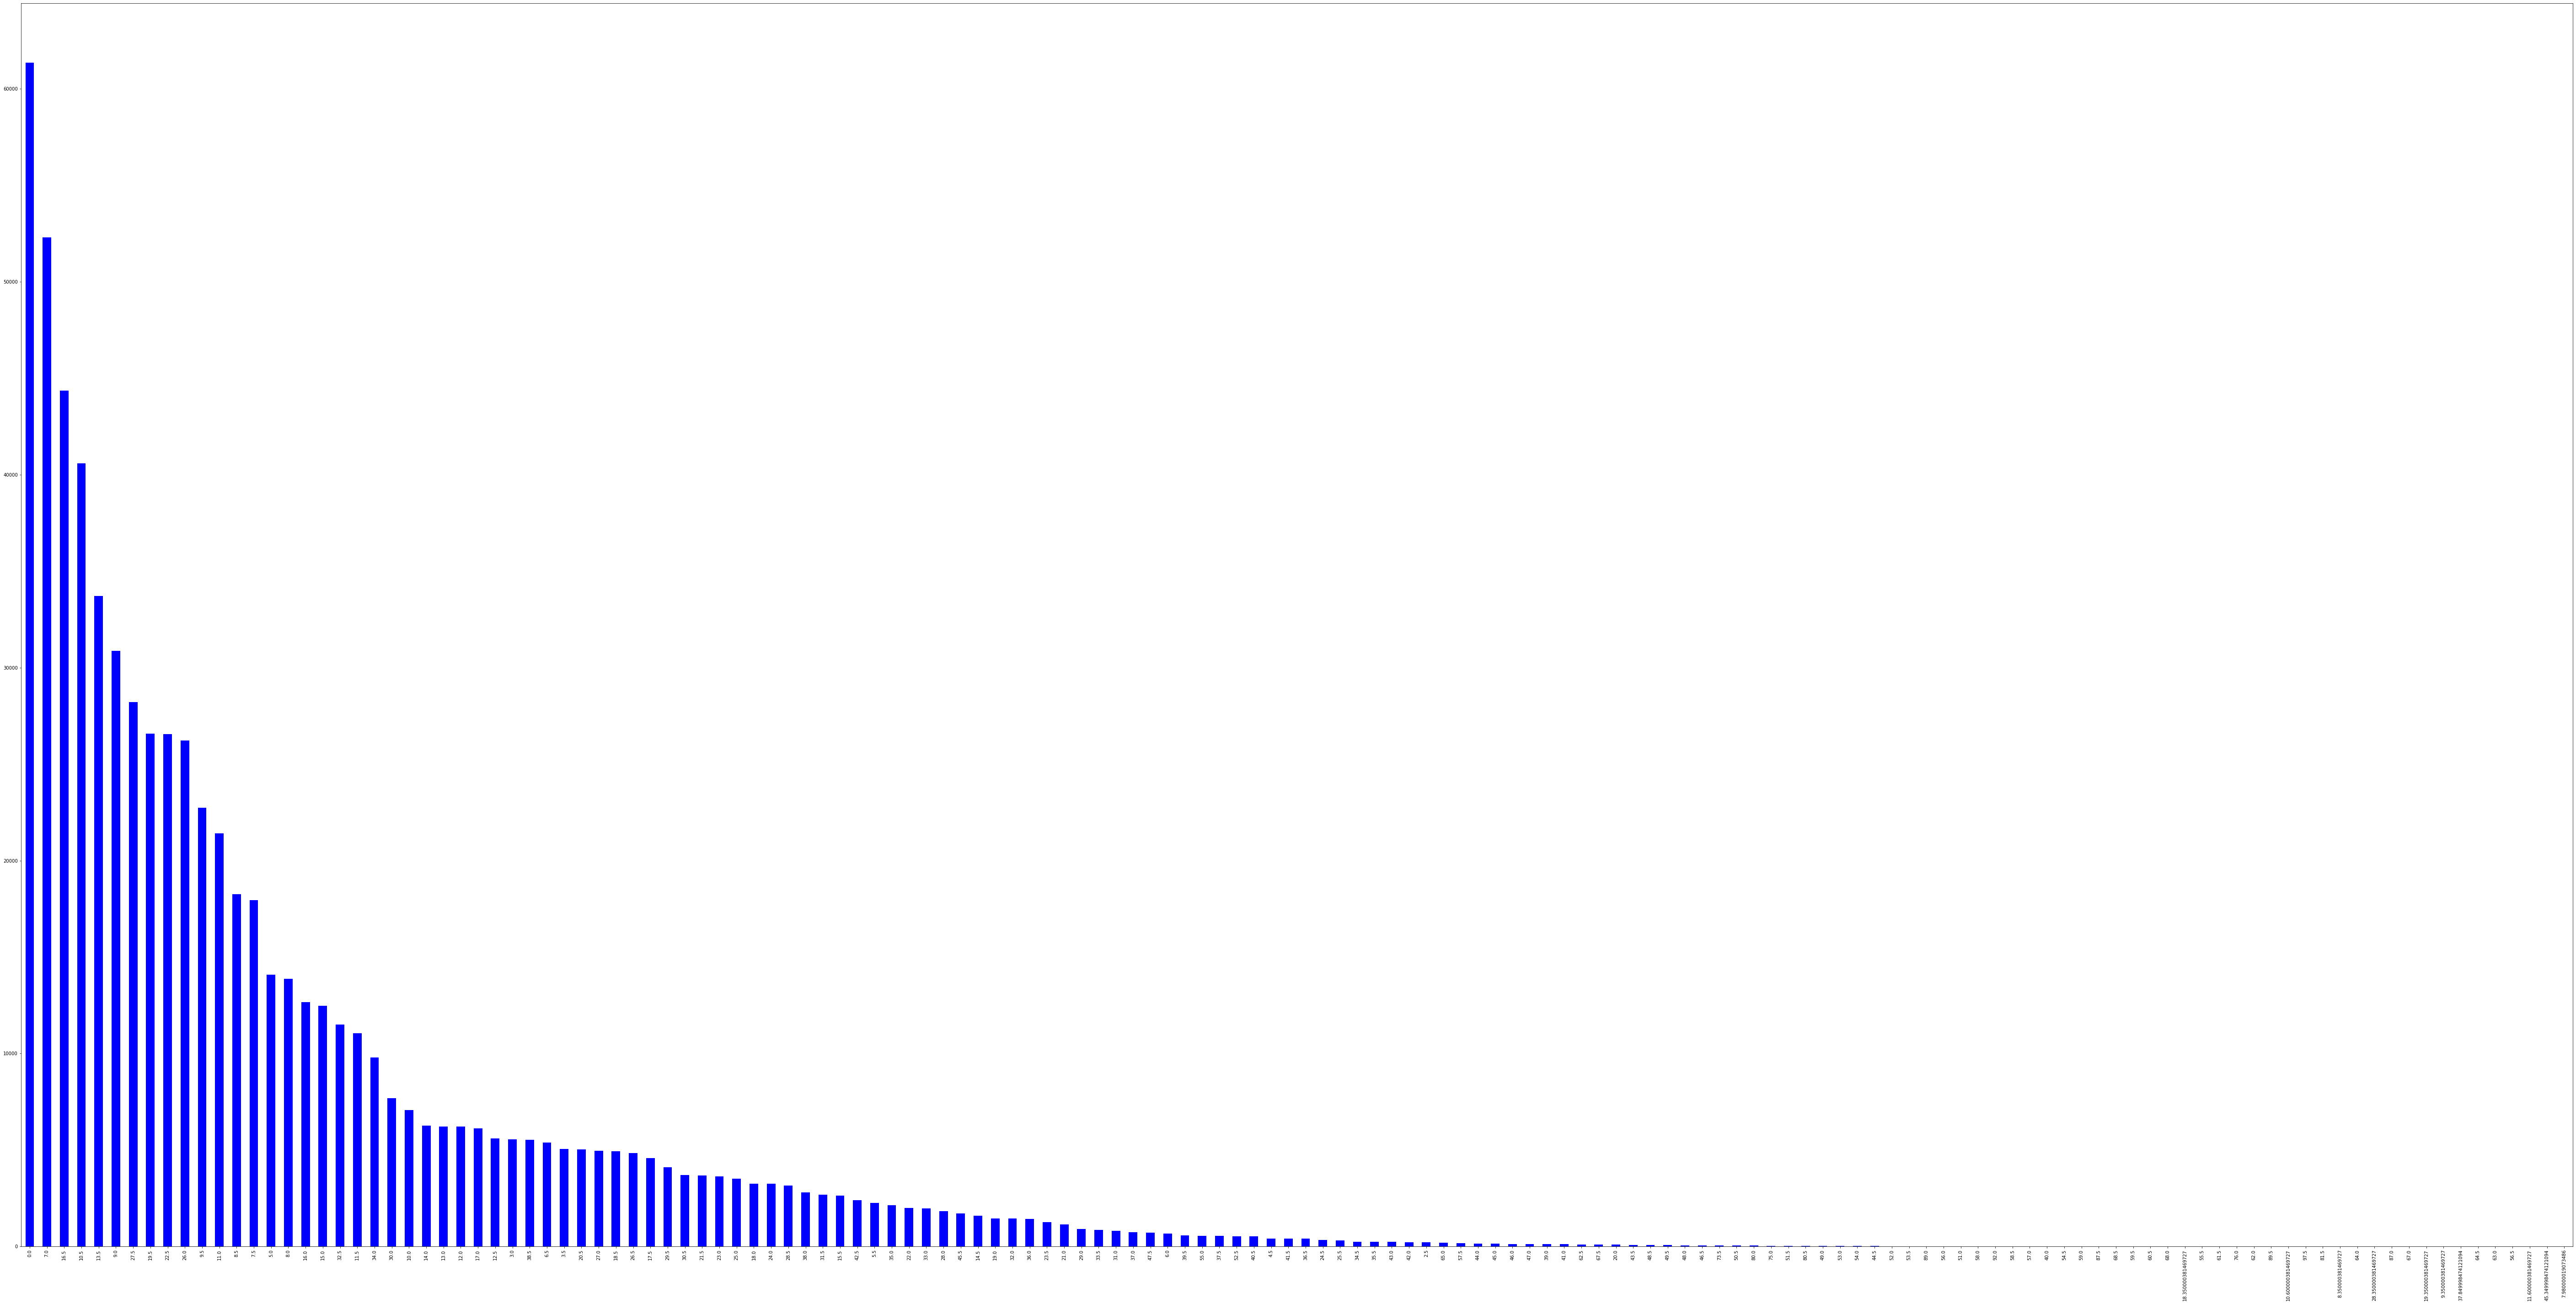

In [43]:
#knowing the price for the cab
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')

<AxesSubplot:>

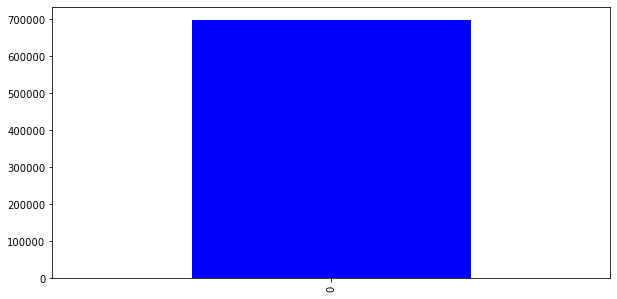

In [45]:
# to know the peak hour of the cab
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

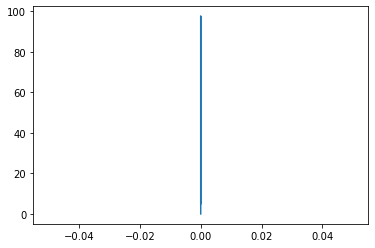

In [48]:
# hour/price
import matplotlib.pyplot as plt
x = a['hour']
y = a['price']
plt.plot(x,y)
plt.show()

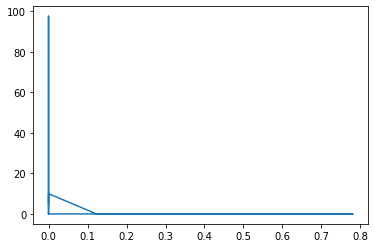

In [50]:
#rain/price
x = a['rain']
y = a['price']
plt.plot(x,y)
plt.show()

In [52]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [62]:
x1=a[['distance', 'temp', 'pressure', 'humidity', 'wind', 'rain', 'day', 'hour', 'surge_multiplier', 'clouds']]
y1=a['price']

In [63]:
# Using skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, y_train, x_test, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 42)

In [64]:
linear = LinearRegression()
linear.fit(x_train,x_test)

LinearRegression()

In [66]:
predictions=linear.predict(y_train)
predictions

array([32.54722229, 14.75563956, 16.81698681, ..., 11.82903499,
       11.85448369, 13.2287152 ])

In [68]:
#knowing actual and predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df
#model is good but not the best, we need to fine tune our model

,Actual,Predicted
81607,42.5,32.547222
354,0.0,14.755640
471801,32.5,16.816987
407645,27.5,10.480252
474760,27.5,10.556598
...,...,...
538489,7.5,10.709291
579511,13.5,15.519101
5421,9.0,11.829035
279982,8.0,11.854484


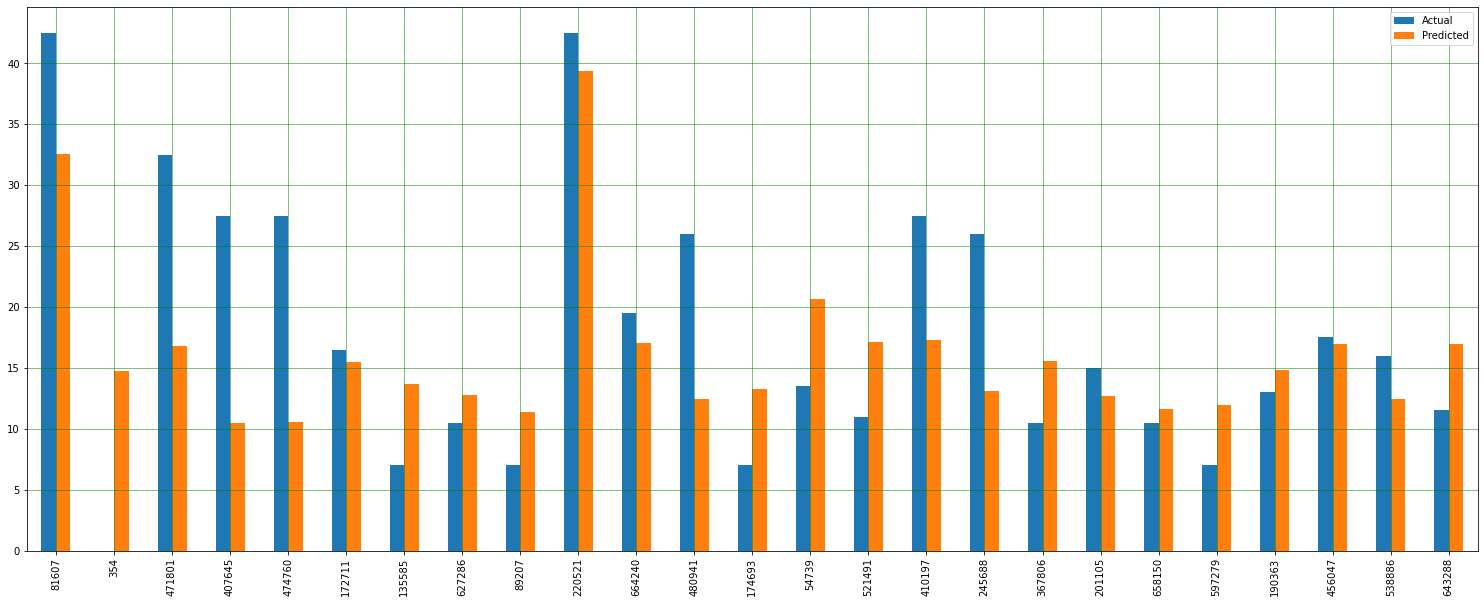

In [69]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()